In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anti-uav-yolo-1024/valid/labels/01028.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01484.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00588.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00286.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00080.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01279.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00440.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/02557.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01936.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00733.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00134.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01466.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00709.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00372.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01850.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/02017.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/02363.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01

In [2]:
!pip install ultralytics

import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import random
import glob
import yaml
import ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 19.3 MB/s eta 0:00:0000:01


In [3]:
# Replace with your own dataset path
dataset_root = '/kaggle/input/anti-uav-yolo-1024'

# Class names (make sure they match your label files)
class_map = {0: 'Drone'}
classes = ['Drone']

In [4]:
def count_objects_per_class(dataset_folder):
    """Counts objects of each class in a specific dataset folder."""
    label_folder = glob.glob(os.path.join(dataset_root, dataset_folder, 'labels', '*.txt'))
    cl = []
    for anno_file in label_folder:
        with open(anno_file) as f:
            lines = [line.strip() for line in open(anno_file, 'r')]
            cl.extend([line[0][0] for line in lines])
    cl_count = {c: cl.count(c) for c in cl}
    return cl_count

In [5]:

# Count objects in train, valid, and test sets
train_counts = count_objects_per_class('train')
valid_counts = count_objects_per_class('valid')
test_counts = count_objects_per_class('test')

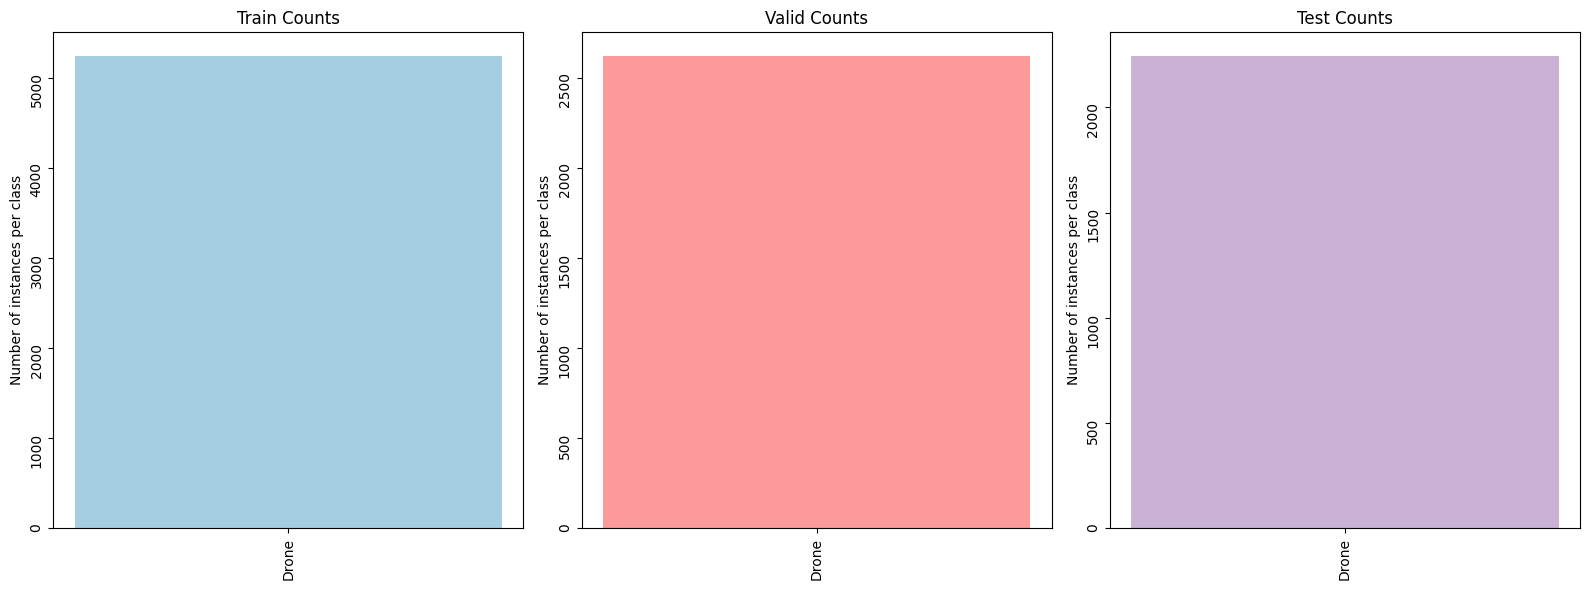

In [6]:
# Visualize object counts (modify as needed)
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
labels = ['Train', 'Validation', 'Test']

colors = plt.cm.Paired(np.arange(len(labels)) / len(labels))

for i, (data_folder, counts) in enumerate(zip(['train', 'valid', 'test'], [train_counts, valid_counts, test_counts])):
    sorted_attribute_names = sorted(list(counts.keys()))
    sorted_measurments = [counts[c] for c in sorted_attribute_names]
    x = np.arange(len(sorted_attribute_names))

    axes[i].bar(x, sorted_measurments, tick_label=[class_map[int(item)] for item in sorted_attribute_names], color=colors[i])
    axes[i].tick_params(rotation=90)
    axes[i].set_title(f'{data_folder.capitalize()} Counts')
    axes[i].set_ylabel('Number of instances per class')

plt.tight_layout()
plt.show()

In [7]:
# Install pyyaml if not already done (make sure you have internet access)
!pip install pyyaml

In [8]:
# Load YOLOv3 model
model = ultralytics.YOLO('yolov3.pt')  # Load pre-trained YOLOv3 weights


PRO TIP 💡 Replace 'model=yolov3.pt' with new 'model=yolov3u.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 198M/198M [00:03<00:00, 69.2MB/s] 


In [9]:
# Data configuration (compatible with YOLOv3 format)
yolo_yaml = {
    'path': dataset_root,
    'train': os.path.join(dataset_root, 'train'),  # Combine images and labels
    'val': os.path.join(dataset_root, 'valid'),
    'test': os.path.join(dataset_root, 'test'),

    # Classes
    'nc': 1,  # Number of classes
    'names': classes  # Use your defined class names
}

In [10]:
# Save data configuration
with open(os.path.join('/kaggle/working/', 'data.yaml'), 'w+') as file:
    yaml.dump(yolo_yaml, file)


In [11]:
# Train the model (adjust hyperparameters as needed)
  # Use keyword arguments
model.train(data='/kaggle/working/data.yaml', epochs=20, batch=16, imgsz=608)
# ... (rest of your analysis code, if any) ...

Ultralytics YOLOv8.1.46 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov3.pt, data=/kaggle/working/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=608, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]
2024-04-11 09:36:59,638	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-11 09:37:00,439	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-11 09:37:02.742578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 09:37:02.742670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 09:37:02.875882: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 1]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     37056  ultralytics.nn.modules.block.Bottleneck      [64, 64]                      
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    295680  ultralytics.nn.modules.block.Bottleneck      [128, 128]                    
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  8   4724736  ultralytics.nn.modules.block.Bottleneck      [256, 256]                    
  7                  -1  1   1180672  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.28.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/anti-uav-yolo-1024/train/labels... 5200 images, 3 backgrounds, 0 corrupt: 100%|██████████| 5200/5200 [00:10<00:00, 515.22it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/anti-uav-yolo-1024/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/anti-uav-yolo-1024/valid/labels... 2600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2600/2600 [00:05<00:00, 471.44it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/anti-uav-yolo-1024/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 84 weight(decay=0.0), 91 weight(decay=0.0005), 90 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 608 train, 608 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      14.4G      1.843      2.502      1.469         25        608: 100%|██████████| 325/325 [05:42<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:58<00:00,  1.40it/s]


                   all       2600       2621      0.511      0.462      0.325      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      14.1G      2.006      1.893      1.557         21        608: 100%|██████████| 325/325 [05:38<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.41it/s]


                   all       2600       2621      0.657      0.306      0.318      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      14.1G      1.951      1.734      1.506         24        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.43it/s]

                   all       2600       2621      0.835      0.597      0.683      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      14.4G      1.822      1.602      1.486         19        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.44it/s]

                   all       2600       2621      0.854      0.592       0.67      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      14.3G      1.735      1.473      1.403         19        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:56<00:00,  1.44it/s]

                   all       2600       2621      0.856      0.621      0.706      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      14.8G      1.666      1.339      1.341         19        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.44it/s]

                   all       2600       2621      0.852      0.643      0.741      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      14.4G      1.598      1.229      1.352         18        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.43it/s]

                   all       2600       2621      0.895      0.704      0.792      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      14.4G      1.553      1.175      1.312         19        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.44it/s]

                   all       2600       2621      0.899      0.728      0.808      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      14.9G      1.515      1.132      1.299         21        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.44it/s]

                   all       2600       2621      0.906      0.736      0.818      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20        14G      1.459      1.054      1.258         21        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.44it/s]

                   all       2600       2621      0.878      0.734      0.807      0.475


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      14.4G      1.405     0.9264      1.214         16        608: 100%|██████████| 325/325 [05:37<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.43it/s]

                   all       2600       2621      0.917      0.764      0.844      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20        15G      1.358      0.881      1.192         15        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.44it/s]

                   all       2600       2621      0.894      0.779      0.846      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      15.2G      1.335     0.8367      1.185         16        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.43it/s]

                   all       2600       2621      0.925      0.775      0.855      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      14.9G      1.294     0.7985      1.165         16        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:56<00:00,  1.44it/s]

                   all       2600       2621      0.923      0.785      0.862      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      14.9G      1.273     0.7558      1.147         16        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.42it/s]

                   all       2600       2621      0.919      0.775      0.854      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20        15G      1.238     0.7357      1.127         16        608: 100%|██████████| 325/325 [05:36<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:56<00:00,  1.44it/s]

                   all       2600       2621      0.928      0.794      0.876      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      14.3G      1.218     0.7038      1.126         15        608: 100%|██████████| 325/325 [05:36<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:56<00:00,  1.44it/s]

                   all       2600       2621      0.952      0.804      0.886      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      14.2G      1.173      0.661      1.118         16        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:56<00:00,  1.44it/s]

                   all       2600       2621      0.945       0.81      0.892      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      14.4G      1.158     0.6462      1.107         16        608: 100%|██████████| 325/325 [05:36<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:57<00:00,  1.43it/s]

                   all       2600       2621      0.933      0.824      0.896      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      14.1G      1.106     0.6115      1.074         16        608: 100%|██████████| 325/325 [05:36<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:56<00:00,  1.44it/s]

                   all       2600       2621      0.925      0.832      0.895      0.578



20 epochs completed in 2.211 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 207.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 207.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv3 summary (fused): 226 layers, 103665011 parameters, 0 gradients, 282.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:59<00:00,  1.37it/s]


                   all       2600       2621      0.933      0.825      0.895      0.582
Speed: 0.1ms preprocess, 19.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg1,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg2,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
metrics/mAP50(B),▁▁▅▅▆▆▇▇▇▇▇▇████████
metrics/mAP50-95(B),▁▁▃▄▄▅▆▆▆▆▇▇▇▆▇▇▇███
metrics/precision(B),▁▃▆▆▆▆▇▇▇▇▇▇██▇█████
metrics/recall(B),▃▁▅▅▅▆▆▇▇▇▇▇▇▇▇█████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇██▇▆▅▅▄▄▄▃▃▃▂▂▂▂▂▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b1a54c41300>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [13]:
import torch

In [14]:
torch.save(model.state_dict(), "trained yolo pt.pt")